### 머신러닝 맛보기

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [35]:
# 훈련데이터와 테스트데이터 분리하기
    # - 수집한 데이터 : 데이터세트
    # - 훈련에 사용되는 데이터 : 훈련데이터세트
    # - 예측에 사용되는 데이터 : 테스트데이터세트
    
# 훈련데이터와 테스트데이터로 분리하는 방법
    # - 훈련데이터와 테스트데이터를 따로 준비
    # - 데이터세트를 특정 비율 또는 갯수로 나누어서 준비

In [36]:
# 데이터 가지고 오기

# 1. 도미 데이터
# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
# 도미 무게
brean_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

print('도미 길이 :', bream_length)
print('-------------------------------------------------------------------------------------------------------------------------')
print('도미 무게 :', brean_weight)
print()
print(len(bream_length), len(brean_weight))

도미 길이 : [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
-------------------------------------------------------------------------------------------------------------------------
도미 무게 : [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

35 35


In [37]:
# 데이터 가지고 오기

# 2. 빙어 데이터
# 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

print('도미 길이 :', smelt_length)
print('-------------------------------------------------------------------------------------------------------------------------')
print('도미 무게 :', smelt_weight)
print()
print(len(smelt_length), len(smelt_weight))

도미 길이 : [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
-------------------------------------------------------------------------------------------------------------------------
도미 무게 : [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

14 14


In [38]:
# [문제]
# 도미, 빙어 데이터세트 이용
# -각각에 대한 정답데이터 생성
# -하나의 2차원데이터 생성
# - 훈련데이터와 테스트데이터 생성하기
# - 훈련데이터 변수: train_input, train_target
# - 테스트데이터 변수: test_input, test_target

# 훈련데이터 35개 테스트데이터 14개로 분리하여
# - 객체생성 > 훈련데이터 학습 > 정확도 평가

In [40]:
lenght = bream_length + smelt_length

In [41]:
weight = brean_weight + smelt_weight

In [42]:
fish_data = [[leng,wei] for leng, wei in zip(lenght,weight)]

In [43]:
fish_target = [1]*35+[0]*14

In [60]:
train_input = fish_data[:35]
train_target = fish_target[:35]

In [61]:
test_input = fish_data[35:]
test_target = fish_target[35:]

In [62]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

### 샘플링 편향
- 특정데이터가 몰려있는 부분으로만 훈련이 이루어진 경우
- 샘플링 편향을 해결방안 : 훈련 및 테스트 데이터 생성시 섞기

In [88]:
# 데이터 섞기위해 numpy의 배열타입으로 변경
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [89]:
print(input_arr.shape)
print(target_arr.shape)

(49, 2)
(49,)


In [95]:
# 배열(데이터) 섞기(numpy.shuffle())
np.random.seed(42)
# 0 ~ 48 까지의 순차적인 번호 생성
index = np.arange(49)
print('index(섞기전) =',index)
print('------------------------------------------------------------------------------------------')

np.random.shuffle(index)
print('index(섞은후) =',index)
print('------------------------------------------------------------------------------------------')

index(섞기전) = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
------------------------------------------------------------------------------------------
index(섞은후) = [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
------------------------------------------------------------------------------------------


In [101]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [102]:
print(train_input)
print(train_target)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


In [113]:
# shuffle = []
# for i in index:
#     shuffle.append(fish_data[i])

[[32.0, 340.0],
 [12.4, 13.4],
 [14.3, 19.7],
 [12.2, 12.2],
 [33.0, 700.0],
 [36.0, 714.0],
 [35.0, 720.0],
 [35.0, 725.0],
 [38.5, 955.0],
 [33.5, 650.0],
 [31.5, 500.0],
 [29.0, 430.0],
 [41.0, 950.0],
 [30.0, 450.0],
 [29.0, 363.0],
 [29.7, 500.0],
 [11.3, 8.7],
 [11.8, 10.0],
 [13.0, 12.2],
 [32.0, 600.0],
 [30.7, 500.0],
 [33.0, 700.0],
 [35.0, 700.0],
 [41.0, 975.0],
 [38.5, 920.0],
 [25.4, 242.0],
 [12.0, 9.8],
 [39.5, 925.0],
 [29.7, 450.0],
 [37.0, 1000.0],
 [31.0, 500.0],
 [10.5, 7.5],
 [26.3, 290.0],
 [34.0, 685.0],
 [26.5, 340.0]]

In [104]:
# 테스트 데이터 생성하기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
print(test_input)
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


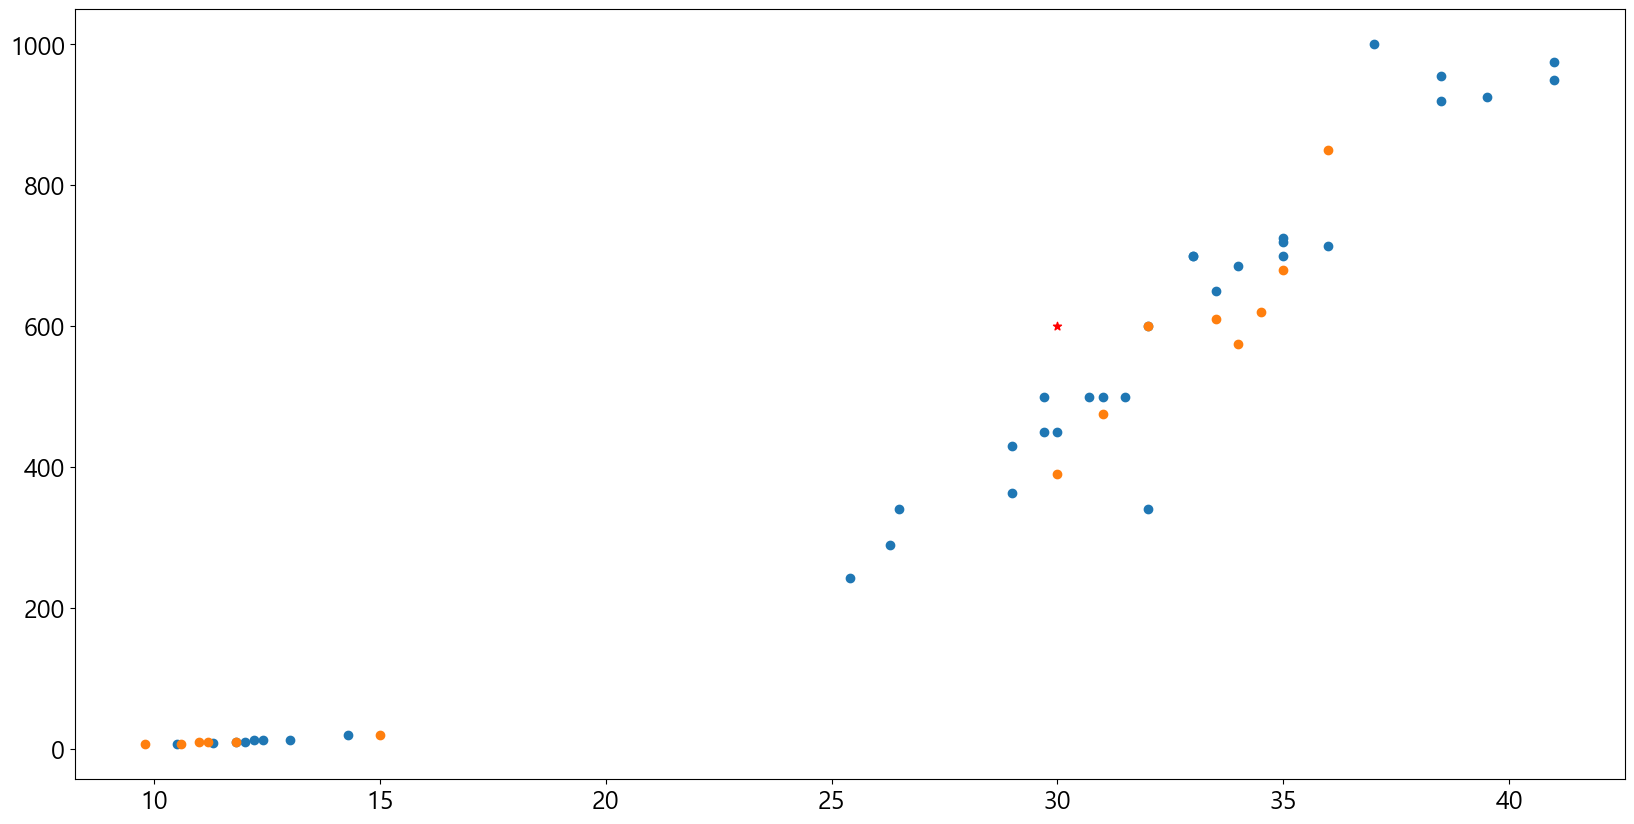

In [109]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.scatter(30, 600, marker='*', c='red')
plt.show()

# 해석
# 파랑색 : 도미
# 주황색 : 빙어
# 도미와 빙어는 길이에 비례해서 무게가 증가하는 것으로 보임
# 다만, 빙어의 경우, 길이에 비례해서 크게 무게가 증가되지는 않는다.
# 빙어는 무게에 비해 길이의 영향을 덜 받는것으로 보인다.

In [110]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [111]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])